In [38]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

I'll be using the parameters as defined below
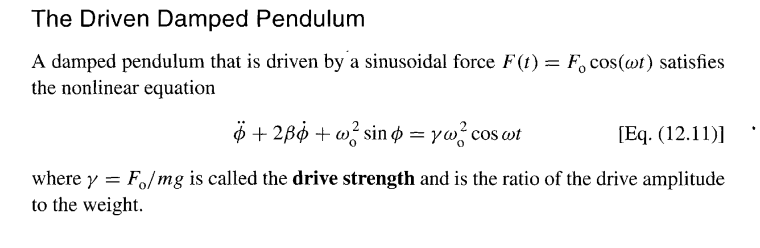

$
\frac{d\phi}{d\\t} = \dot{\phi}
\\[5mm]
\frac{d\dot{\phi}}{d\\t} = -\omega_0^2 sin(\phi) - 2\beta\dot{\phi} + \gamma \omega_0^2 cos(\omega t)
$

In [39]:
# 
def eom_dpp(t,state,beta,gamma,omega0,omega):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    state: Array of size 2 describing state of the system
        state[0]: phi, the pendulum angle from the vertical
        state[1]: phi_dot, angular velocity    
    beta: damping parameter
    gamma: drive strength
    omega0: Resonant frequency
    omega: drive frequency
    '''

    phi = state[0]
    phi_dot = state[1]

    d_phi_dt = phi_dot
    d_phi_dot_dt = -2*beta*phi_dot - omega0**2*np.sin(phi) + gamma*omega0**2*np.cos(omega*t)
    return (d_phi_dt,d_phi_dot_dt)

In [68]:
phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])


gamma = 1.5        # Driving amplitude
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/8         # Damping parameter

t_start = 0
t_end = 60
t_eval = np.linspace(t_start,t_end,61)

t_start = 0
t_end = 60
t_eval1 = np.linspace(t_start,t_end,10)

t_start = 0
t_end = 60
t_eval2 = np.linspace(t_start,t_end,601)


In [78]:
sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-14, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi = sol.y[0]
phi_dot = sol.y[1]
t = sol.t

sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval1,atol=1e-14, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi1 = sol.y[0]
phi_dot1 = sol.y[1]
t1 = sol.t

sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval2,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi2 = sol.y[0]
phi_dot2 = sol.y[1]
t2 = sol.t


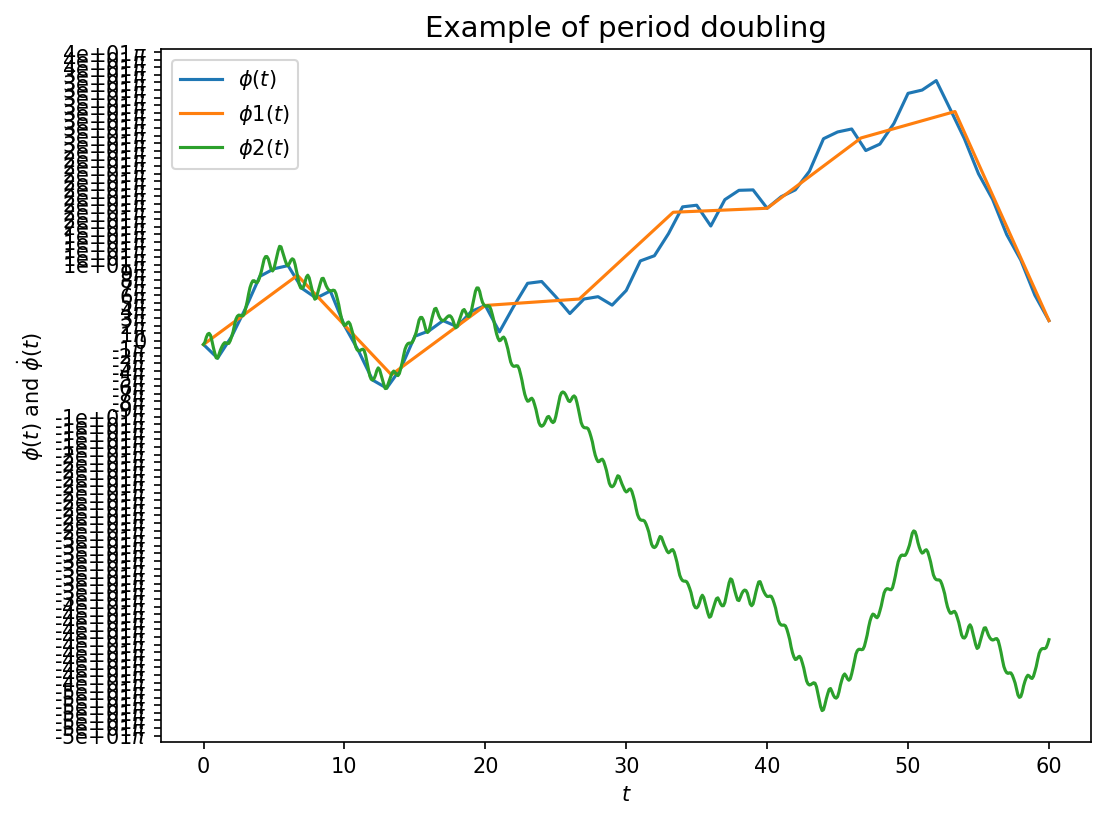

In [79]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

ax.plot(t_eval,phi, label='$\phi(t)$')
ax.plot(t_eval1,phi1, label='$\phi1(t)$')
ax.plot(t_eval2,phi2, label='$\phi2(t)$')


ax.set_title("Example of period doubling",fontsize=14)
ax.set_xlabel("$t$")
ax.set_ylabel("$\phi(t)$ and $\dot{\phi}(t)$"); # No idea why I need \\theta
ax.legend()
#ax.set_xlim([0,600])
# For setting the y-axis in units of pi
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))

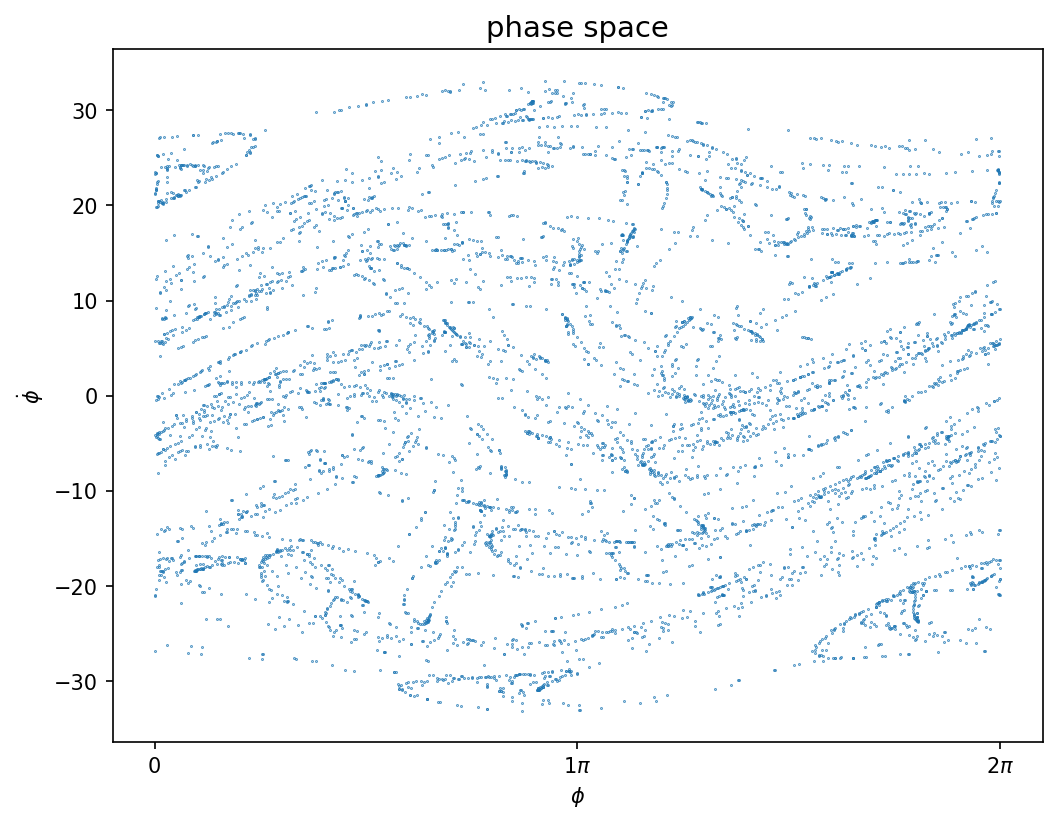

In [50]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

ax.set_xlabel("$\phi$")
ax.set_ylabel("$\dot{\phi}$")
ax.set_title("phase space",fontsize=14)
tplot = 100

phi_remainder = np.remainder(phi-1.1*np.pi,2*np.pi)
ax.scatter(phi_remainder[tplot:],phi_dot[tplot:], s = .1);

# For setting the y-axis in units of pi
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

# Bifurcation Map

In [413]:
gamma_list = np.linspace(1.06,1.087,271)
length_gamma_list = len(gamma_list)
length_bifurcation_pts = len(t_eval[500::10])

#initialize gamma_matrix and birfurcation pts
gamma_matrix = np.ones(shape=(length_gamma_list,length_bifurcation_pts))
bifurcation_pts = np.zeros(shape=(length_gamma_list,length_bifurcation_pts))

for index in np.arange(length_gamma_list):
    gamma_matrix[index] = gamma_list[index]*gamma_matrix[index]

for index in np.arange(length_gamma_list):
    sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma_list[index],omega0,omega))

    phi = sol.y[0]
    
    bifurcation_pts[index] = phi[500::10]




c:\Users\henry\git\DPP_Chaos\.venv\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


Text(0.5, 1.0, 'Bifurcation Map')

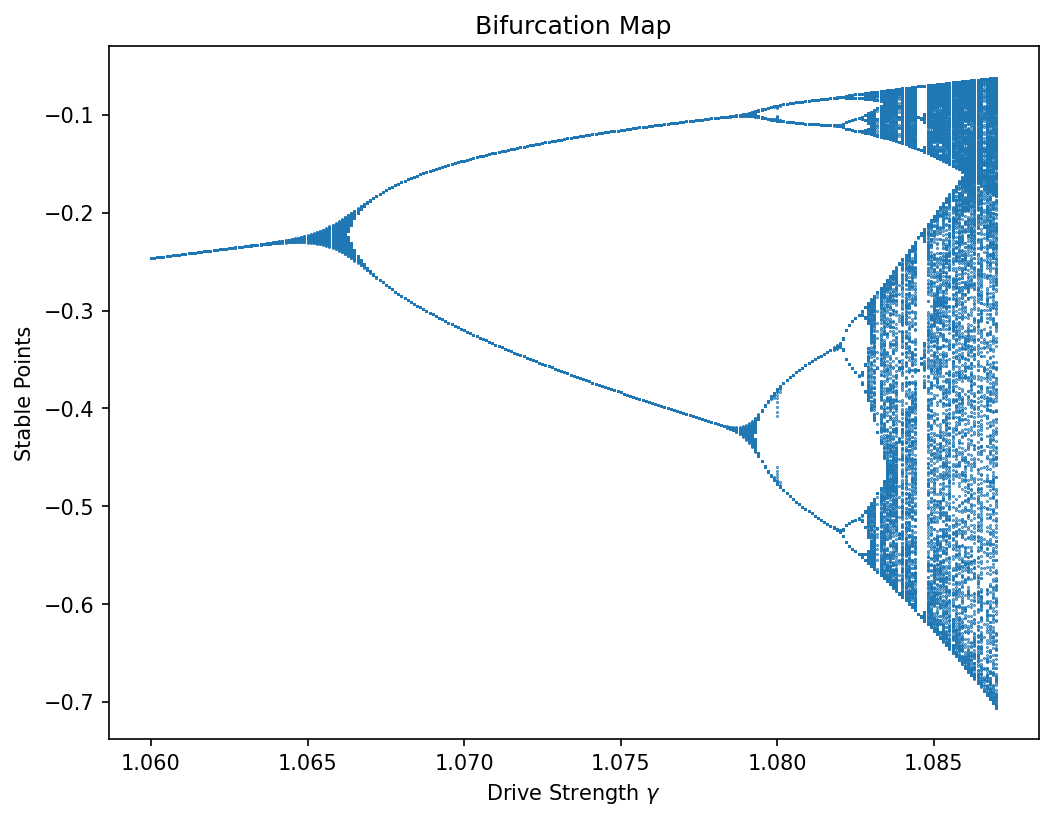

In [419]:
fig, ax = plt.subplots(figsize = (8,6), dpi=150)


ax.scatter(gamma_matrix,bifurcation_pts, s=0.15)
ax.set_xlabel('Drive Strength $\gamma$')
ax.set_ylabel('Stable Points')
ax.set_title('Bifurcation Map')

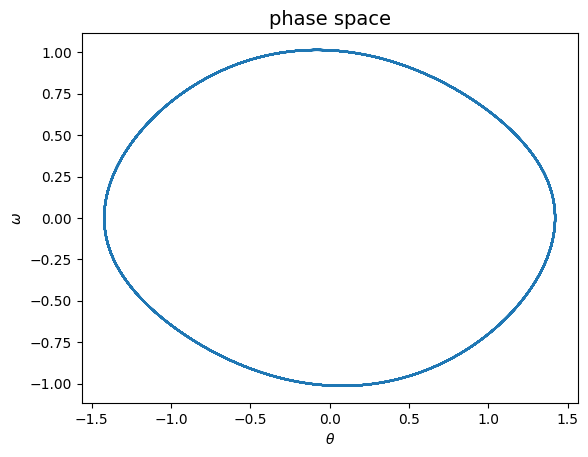

In [19]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 5000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.105        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(14,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

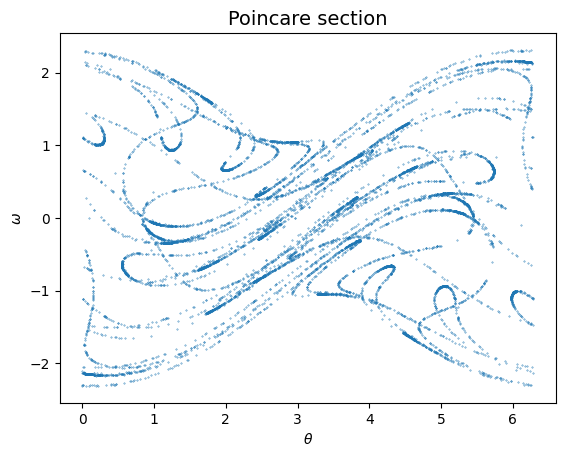

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);